In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

%matplotlib inline

In [2]:
def projectile(r, t, g=9.8):
    """The RHS of Newton's 2nd law for projectile motion"""    
    x,y,vx,vy = r
    dx = vx
    dy = vy
    dvx = 0
    dvy = -g
    
    return np.array([dx, dy, dvx, dvy])

In [3]:
times = np.linspace(0,4,1000)
r0 = np.array([0,0,10,20])

In [4]:
results = odeint(projectile, r0, times)

In [6]:
results.shape

(1000, 4)

Text(0.5,1,'Velocity vs time graphs')

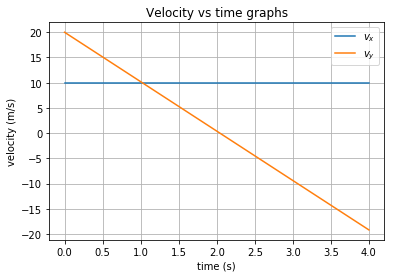

In [9]:
plt.plot(times, results[:,2], label=r"$v_x$")
plt.plot(times, results[:,3], label=r"$v_y$")
plt.legend()
plt.grid()
plt.ylabel("velocity (m/s)")
plt.xlabel("time (s)")
plt.title("Velocity vs time graphs")

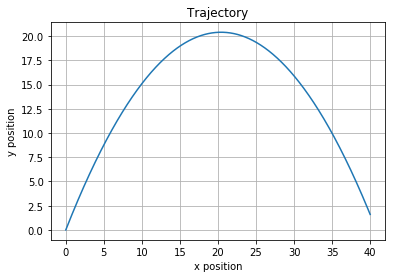

In [10]:
plt.plot(results[:,0], results[:,1])
plt.title("Trajectory")
plt.xlabel("x position")
plt.ylabel("y position")
plt.grid()

In [13]:
resdf = pd.DataFrame(results, columns=["x", "y", "v_x", "v_y"], index=times)

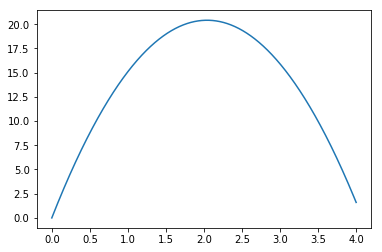

In [15]:
resdf.y.plot()

In [16]:
def proj_drag(r, t, g=9.8, b=0.01, c=0.01, m=1):
    """The RHS of Newton's 2nd law for projectile motion with drag"""    
    x,y,vx,vy = r
    
    vsq = vx**2 + vy**2
    vmag = np.sqrt(vsq)
    
    dx = vx
    dy = vy
    dvx = - b*vx/m - c*vsq*vx/(vmag*m)
    dvy = -g - b*vy/m - c*vsq*vy/(vmag*m)
    
    return np.array([dx, dy, dvx, dvy])

In [17]:
results = odeint(proj_drag, r0, times)

In [18]:
drag_df = pd.DataFrame(results, columns=["x", "y", "vx", "vy"], index=times)

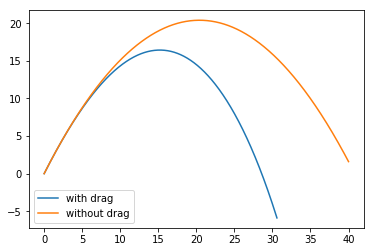

In [20]:
plt.plot(drag_df.x, drag_df.y, label="with drag")
plt.plot(resdf.x, resdf.y, label="without drag")
plt.legend()

In [21]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

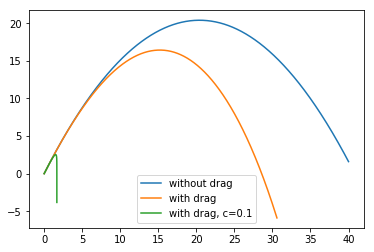

In [28]:
res5 = odeint(proj_drag, r0, times, args=(9.8, 5.01, 0.1, 1.0))
res5df = pd.DataFrame(res5, columns=["x", "y", "vx", "vy"], index=times)
plt.plot(resdf.x, resdf.y, label="without drag")
plt.plot(drag_df.x, drag_df.y, label="with drag")
plt.plot(res5df.x, res5df.y, label="with drag, c=0.1")
plt.legend()

## Boundary value problem: Schrodinger's equation

In [30]:
def qho(y, x, E):
    """Quantum harmonic oscillator"""
    psi, psiprime = y
    psidoubleprime = -(E-x**2/2)*psi
    
    return np.array([psiprime, psidoubleprime])

In [32]:
positions = np.linspace(-1, 1, 1000)
y0 = (0.1, 0.1)
results = odeint(qho, y0, positions, args=(1.0,))

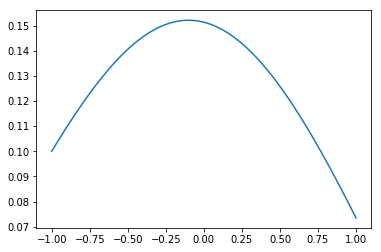

In [33]:
plt.plot(positions, results[:,0])

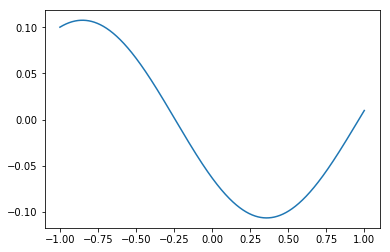

In [43]:
positions = np.linspace(-1, 1, 1000)
y0 = (0.1, 0.1)
results = odeint(qho, y0, positions, args=(6.87,))
plt.plot(positions, results[:,0])

We will need to "shoot" to get the correct energy.